In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv(r"D:\Datasets\train.csv")
df_test=pd.read_csv(r"D:\Datasets\test.csv")
df1=df.copy()

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
print("Number of object columns=",df.select_dtypes(include=["object"]).columns.value_counts().sum())
print("Number of int columns=",df.select_dtypes(include=["int64"]).columns.value_counts().sum())
print("Number of float columns=",df.select_dtypes(include=["float64"]).columns.value_counts().sum())

Number of object columns= 43
Number of int columns= 35
Number of float columns= 3


In [8]:
df.shape

(1460, 81)

<AxesSubplot:>

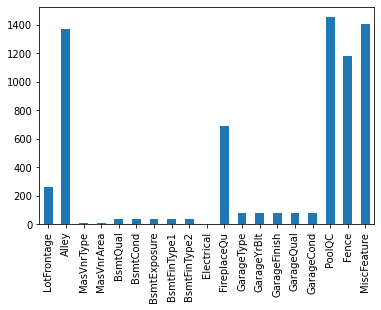

In [9]:
missing_vals=df.isnull().sum()
missing_vals=missing_vals[missing_vals>0]
missing_vals.plot.bar()

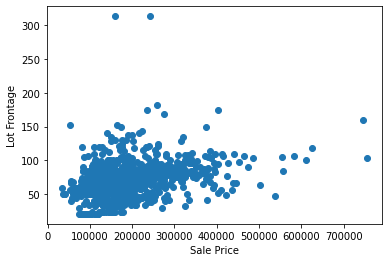

In [10]:
plt.xlabel("Sale Price")
plt.ylabel("Lot Frontage")


plt.scatter(df["SalePrice"],df["LotFrontage"])

Text(0, 0.5, 'Lot Area (Sq. Feet)')

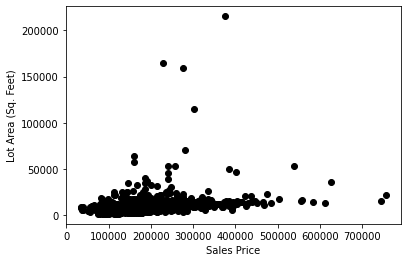

In [11]:
plt.scatter(df["SalePrice"],df["LotArea"],color="k")
plt.xlabel("Sales Price")
plt.ylabel("Lot Area (Sq. Feet)")

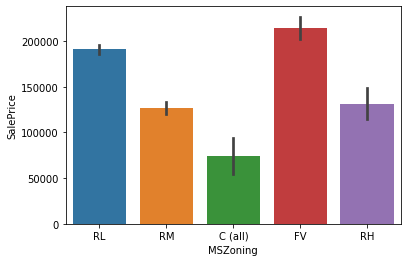

In [12]:
ax=sns.barplot(x="MSZoning",y="SalePrice",data=df)
plt.show()


#MSZoning: Identifies the general zoning classification of the sale.
		
     #  A	Agriculture
      # C	Commercial
       #FV	Floating Village Residential
       #I	Industrial
      # RH	Residential High Density
      # RL	Residential Low Density
      # RP	Residential Low Density Park 
     #  RM	Residential Medium Density

<BarContainer object of 1460 artists>

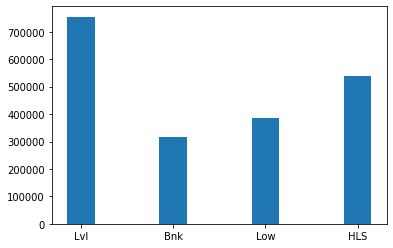

In [13]:
plt.bar(df["LandContour"],df["SalePrice"],width=0.3)

Text(0, 0.5, 'GrLivArea')

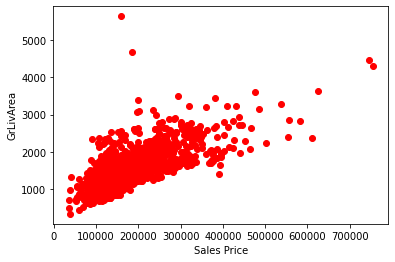

In [14]:
plt.scatter(df["SalePrice"],df["GrLivArea"],color="r")
plt.xlabel("Sales Price")
plt.ylabel("GrLivArea")

In [15]:
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index)

In [16]:
df.shape

(1458, 81)

Text(0, 0.5, 'GrLivArea')

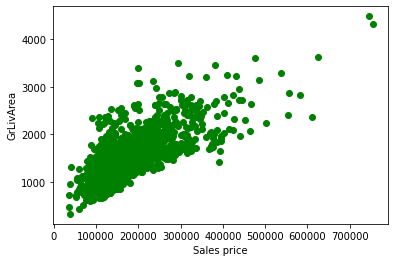

In [17]:
plt.scatter(df["SalePrice"],df["GrLivArea"],color="g")
plt.xlabel("Sales price")
plt.ylabel("GrLivArea")

In [18]:
missing_vals_pct=(missing_vals/len(df))*100
missing_vals_pct

LotFrontage     17.764060
Alley           93.895748
MasVnrType       0.548697
MasVnrArea       0.548697
BsmtQual         2.537723
BsmtCond         2.537723
BsmtExposure     2.606310
BsmtFinType1     2.537723
BsmtFinType2     2.606310
Electrical       0.068587
FireplaceQu     47.325103
GarageType       5.555556
GarageYrBlt      5.555556
GarageFinish     5.555556
GarageQual       5.555556
GarageCond       5.555556
PoolQC          99.657064
Fence           80.864198
MiscFeature     96.433471
dtype: float64

<AxesSubplot:>

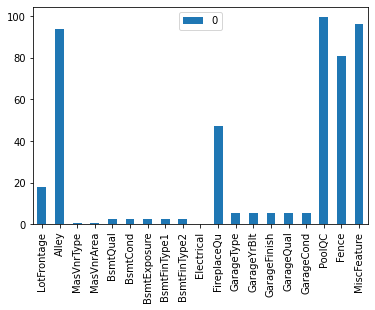

In [19]:
miss_df=pd.DataFrame(missing_vals_pct)
miss_df.plot.bar()

In [20]:
df.drop(["Alley","FireplaceQu","PoolQC","Fence","MiscFeature"],axis=1, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1458 non-null   int64  
 1   MSSubClass     1458 non-null   int64  
 2   MSZoning       1458 non-null   object 
 3   LotFrontage    1199 non-null   float64
 4   LotArea        1458 non-null   int64  
 5   Street         1458 non-null   object 
 6   LotShape       1458 non-null   object 
 7   LandContour    1458 non-null   object 
 8   Utilities      1458 non-null   object 
 9   LotConfig      1458 non-null   object 
 10  LandSlope      1458 non-null   object 
 11  Neighborhood   1458 non-null   object 
 12  Condition1     1458 non-null   object 
 13  Condition2     1458 non-null   object 
 14  BldgType       1458 non-null   object 
 15  HouseStyle     1458 non-null   object 
 16  OverallQual    1458 non-null   int64  
 17  OverallCond    1458 non-null   int64  
 18  YearBuil

In [22]:
print(df["MasVnrType"].unique())
print(df["MasVnrType"].isnull().sum())

['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
8


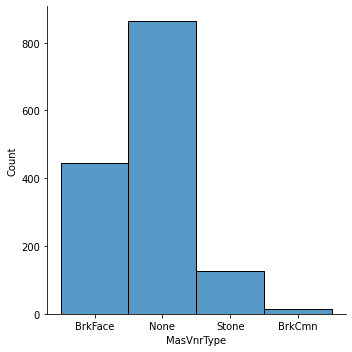

In [23]:
sns.displot(df["MasVnrType"])

In [24]:
df["MasVnrType"].fillna(df["MasVnrType"].mode()[0],inplace=True)

In [25]:
df["MasVnrType"].isnull().sum()

0

C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


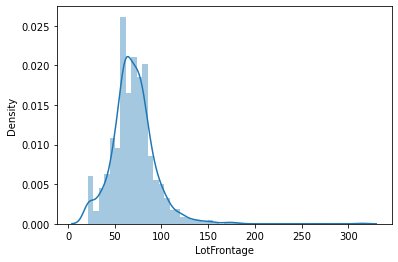

In [26]:
ax=sns.distplot(df["LotFrontage"])

C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


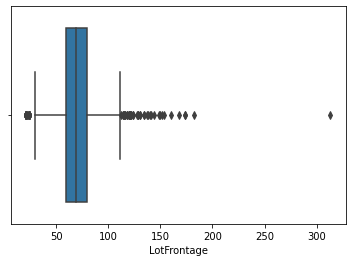

In [27]:
ax=sns.boxplot(df["LotFrontage"])

In [28]:
print(df["LotFrontage"].isnull().sum())
#df["LotFrontage"].mean()
df.LotFrontage.median()

259


69.0

In [29]:
df.LotFrontage.fillna(df.LotFrontage.median(),inplace=True)

In [30]:
df.LotFrontage.isnull().sum()

0

C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


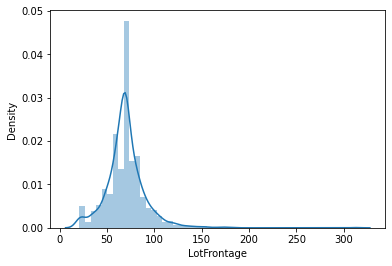

In [31]:
ax=sns.distplot(df["LotFrontage"])

C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


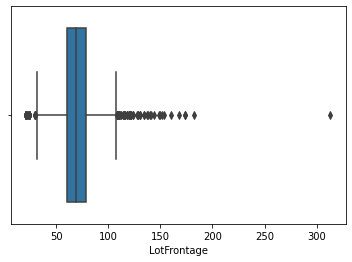

In [32]:
ax=sns.boxplot(df.LotFrontage)

In [33]:
def show(x):
    print("null values in",x,":",df[x].isnull().sum())
    if df[x].dtypes=="object":
        
        print("mode of",x,":",df[x].mode())
        
    else:
        print("mean of",x,":",df[x].mean())
        print("median of",x,":",df[x].median())
        print("mode of",x,":",df[x].mode())
    
        sns.distplot(df[x])
    
        plt.show()
    
        sns.boxplot(df[x])
        plt.show()
    

C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


null values in MasVnrArea : 8
mean of MasVnrArea : 102.75379310344827
median of MasVnrArea : 0.0
mode of MasVnrArea : 0    0.0
dtype: float64


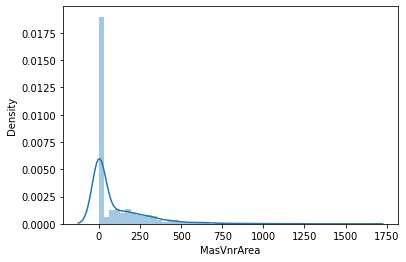

C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


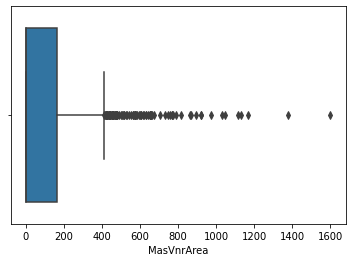

In [34]:
show("MasVnrArea")

In [35]:
df.MasVnrArea.fillna(df.MasVnrArea.mode()[0],inplace=True)

C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


null values in MasVnrArea : 0
mean of MasVnrArea : 102.18998628257887
median of MasVnrArea : 0.0
mode of MasVnrArea : 0    0.0
dtype: float64


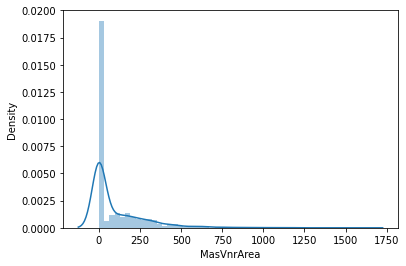

C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


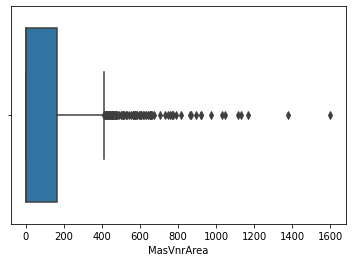

In [36]:
show("MasVnrArea")

In [37]:
show("BsmtQual")

null values in BsmtQual : 37
mode of BsmtQual : 0    TA
dtype: object


In [38]:
df.BsmtQual.fillna(df.BsmtQual.mode()[0], inplace=True)

In [39]:
show("BsmtQual")

null values in BsmtQual : 0
mode of BsmtQual : 0    TA
dtype: object


In [40]:
show("BsmtCond")

null values in BsmtCond : 37
mode of BsmtCond : 0    TA
dtype: object


In [41]:
df.BsmtCond.fillna(df.BsmtCond.mode()[0], inplace=True)

In [42]:
show("BsmtCond")

null values in BsmtCond : 0
mode of BsmtCond : 0    TA
dtype: object


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1458 non-null   int64  
 1   MSSubClass     1458 non-null   int64  
 2   MSZoning       1458 non-null   object 
 3   LotFrontage    1458 non-null   float64
 4   LotArea        1458 non-null   int64  
 5   Street         1458 non-null   object 
 6   LotShape       1458 non-null   object 
 7   LandContour    1458 non-null   object 
 8   Utilities      1458 non-null   object 
 9   LotConfig      1458 non-null   object 
 10  LandSlope      1458 non-null   object 
 11  Neighborhood   1458 non-null   object 
 12  Condition1     1458 non-null   object 
 13  Condition2     1458 non-null   object 
 14  BldgType       1458 non-null   object 
 15  HouseStyle     1458 non-null   object 
 16  OverallQual    1458 non-null   int64  
 17  OverallCond    1458 non-null   int64  
 18  YearBuil

In [44]:
show("BsmtExposure")

null values in BsmtExposure : 38
mode of BsmtExposure : 0    No
dtype: object


In [45]:
df.BsmtExposure.fillna(df.BsmtExposure.mode()[0],inplace=True)

In [46]:
show("BsmtExposure")

null values in BsmtExposure : 0
mode of BsmtExposure : 0    No
dtype: object


In [47]:
show("BsmtFinType1")

null values in BsmtFinType1 : 37
mode of BsmtFinType1 : 0    Unf
dtype: object


In [48]:
df.BsmtFinType1.fillna(df.BsmtFinType1.mode()[0], inplace=True)

In [49]:
show("BsmtFinType1")

null values in BsmtFinType1 : 0
mode of BsmtFinType1 : 0    Unf
dtype: object


In [50]:
show("BsmtFinType2")

null values in BsmtFinType2 : 38
mode of BsmtFinType2 : 0    Unf
dtype: object


In [51]:
df.BsmtFinType2.fillna(df.BsmtFinType2.mode()[0], inplace=True)

In [52]:
show("BsmtFinType2")

null values in BsmtFinType2 : 0
mode of BsmtFinType2 : 0    Unf
dtype: object


In [53]:
show("Electrical")

null values in Electrical : 1
mode of Electrical : 0    SBrkr
dtype: object


In [54]:
df.Electrical.fillna(df.Electrical.mode()[0], inplace=True)

In [55]:
show("Electrical")

null values in Electrical : 0
mode of Electrical : 0    SBrkr
dtype: object


In [56]:
show("GarageType")

null values in GarageType : 81
mode of GarageType : 0    Attchd
dtype: object


In [57]:
df.GarageType.fillna(df.GarageType.mode()[0], inplace=True)

In [58]:
show("GarageType")

null values in GarageType : 0
mode of GarageType : 0    Attchd
dtype: object


null values in GarageYrBlt : 81
mean of GarageYrBlt : 1978.4640522875818
median of GarageYrBlt : 1980.0
mode of GarageYrBlt : 0    2005.0
dtype: float64


C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


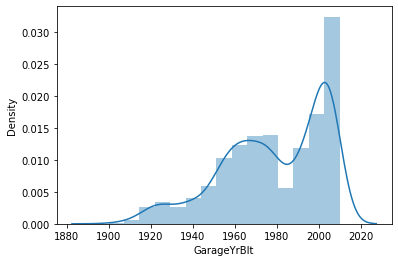

C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


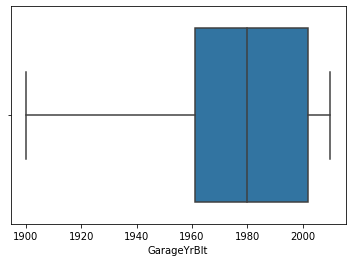

In [59]:
show("GarageYrBlt")

In [60]:
df.GarageYrBlt.fillna(df.GarageYrBlt.median(), inplace=True)

C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


null values in GarageYrBlt : 0
mean of GarageYrBlt : 1978.5493827160494
median of GarageYrBlt : 1980.0
mode of GarageYrBlt : 0    1980.0
dtype: float64


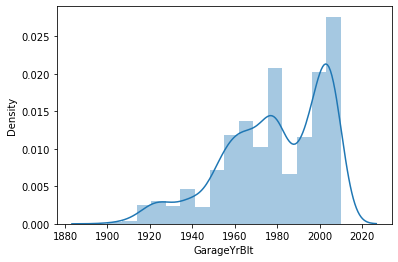

C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


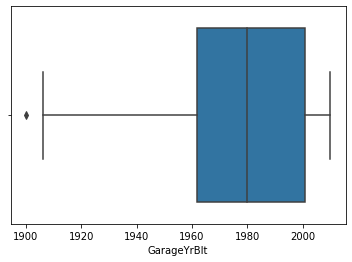

In [61]:
show("GarageYrBlt")

In [62]:
show("GarageFinish")

null values in GarageFinish : 81
mode of GarageFinish : 0    Unf
dtype: object


In [63]:
df.GarageFinish.fillna(df.GarageFinish.mode()[0], inplace=True)

In [64]:
show("GarageQual")

null values in GarageQual : 81
mode of GarageQual : 0    TA
dtype: object


In [65]:
df.GarageQual.fillna(df.GarageQual.mode()[0], inplace=True)

In [66]:
show("GarageCond")

null values in GarageCond : 81
mode of GarageCond : 0    TA
dtype: object


In [67]:
df.GarageCond.fillna(df.GarageCond.mode()[0], inplace=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1458 non-null   int64  
 1   MSSubClass     1458 non-null   int64  
 2   MSZoning       1458 non-null   object 
 3   LotFrontage    1458 non-null   float64
 4   LotArea        1458 non-null   int64  
 5   Street         1458 non-null   object 
 6   LotShape       1458 non-null   object 
 7   LandContour    1458 non-null   object 
 8   Utilities      1458 non-null   object 
 9   LotConfig      1458 non-null   object 
 10  LandSlope      1458 non-null   object 
 11  Neighborhood   1458 non-null   object 
 12  Condition1     1458 non-null   object 
 13  Condition2     1458 non-null   object 
 14  BldgType       1458 non-null   object 
 15  HouseStyle     1458 non-null   object 
 16  OverallQual    1458 non-null   int64  
 17  OverallCond    1458 non-null   int64  
 18  YearBuil

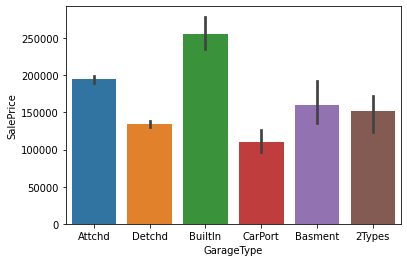

In [69]:
ax=sns.barplot(x="GarageType", y="SalePrice",data=df)
plt.show()

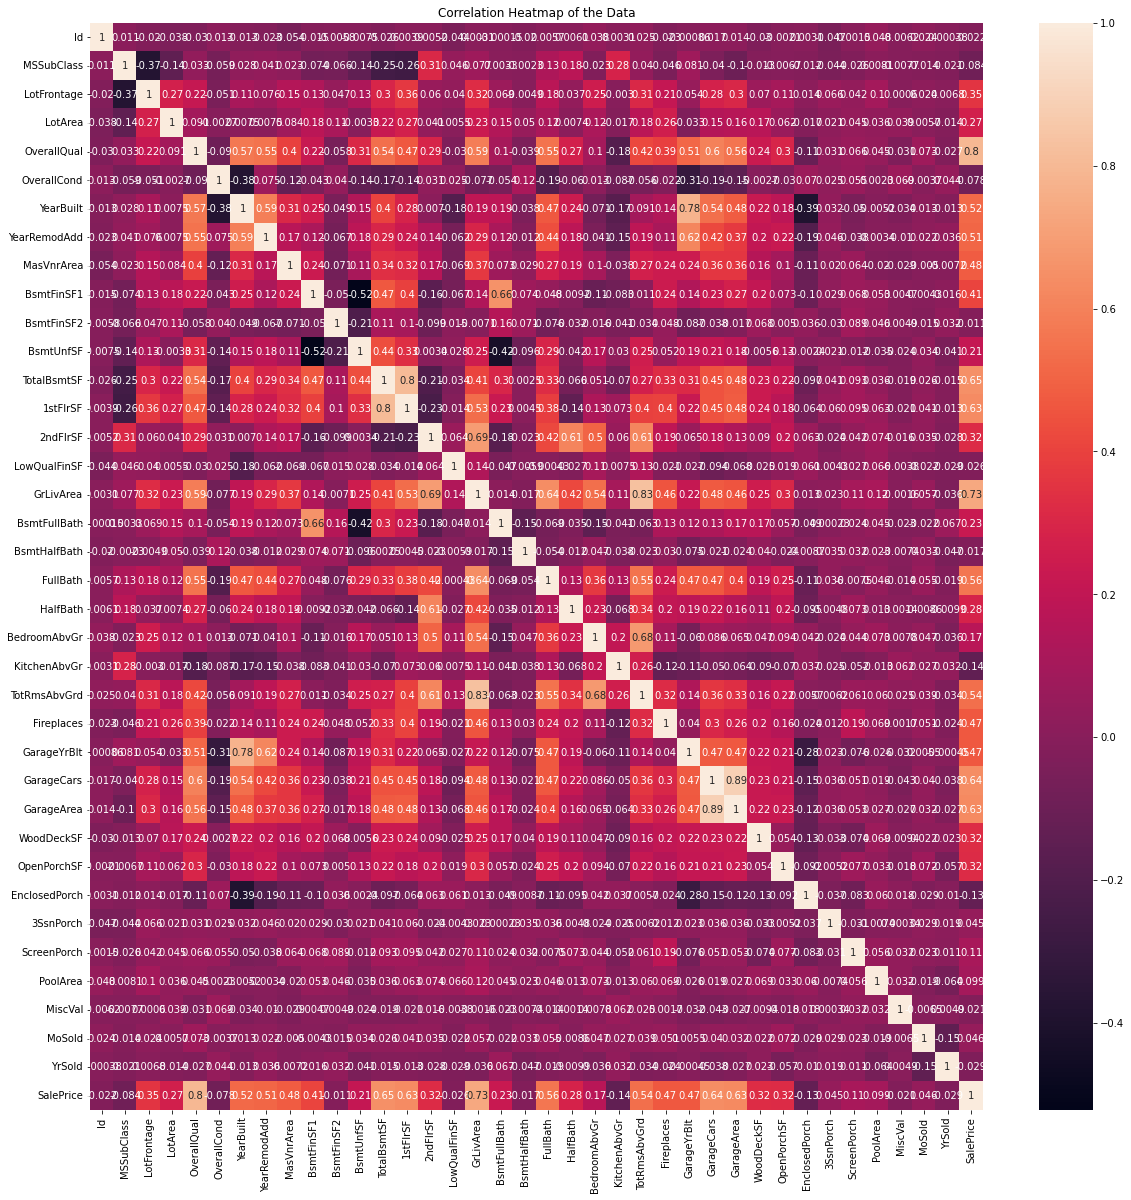

In [70]:
plt.figure(figsize=(20,20))
plt.title("Correlation Heatmap of the Data")

ax=sns.heatmap(df.corr(), annot=True)
plt.show()

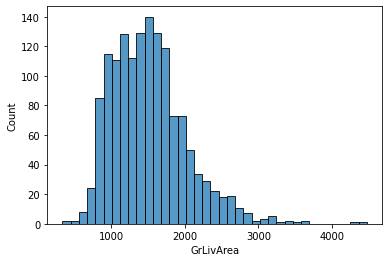

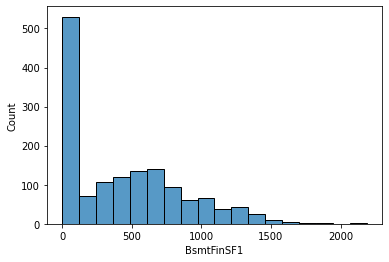

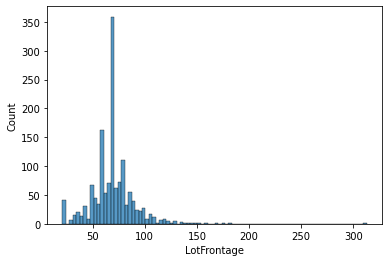

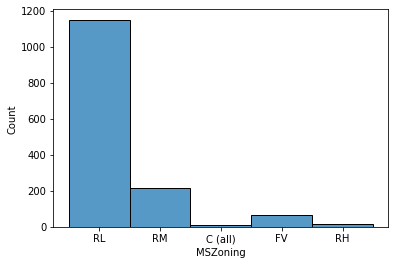

In [71]:
ax1=sns.histplot(x=df["GrLivArea"],data=df)
plt.show()
ax2=sns.histplot(x=df["BsmtFinSF1"],data=df)
plt.show()
ax3=sns.histplot(x=df["LotFrontage"],data=df)
plt.show()
ax4=sns.histplot(x=df["MSZoning"],data=df)



In [72]:
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

In [73]:
df.select_dtypes(include=["object"]).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [74]:
categorical_cols=('MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition')

In [75]:
for i in categorical_cols:
    encoder=LabelEncoder()
    encoder.fit(list(df[i].values))
    df[i]=encoder.transform(list(df[i].values))

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1458 non-null   int64  
 1   MSSubClass     1458 non-null   int64  
 2   MSZoning       1458 non-null   int32  
 3   LotFrontage    1458 non-null   float64
 4   LotArea        1458 non-null   int64  
 5   Street         1458 non-null   int32  
 6   LotShape       1458 non-null   int32  
 7   LandContour    1458 non-null   int32  
 8   Utilities      1458 non-null   int32  
 9   LotConfig      1458 non-null   int32  
 10  LandSlope      1458 non-null   int32  
 11  Neighborhood   1458 non-null   int32  
 12  Condition1     1458 non-null   int32  
 13  Condition2     1458 non-null   int32  
 14  BldgType       1458 non-null   int32  
 15  HouseStyle     1458 non-null   int32  
 16  OverallQual    1458 non-null   int64  
 17  OverallCond    1458 non-null   int64  
 18  YearBuil

In [77]:
int_cols=df.select_dtypes(include=["int64"])
float_cols=df.select_dtypes(include=["float64"]).columns
#int_cols=int_cols.drop("Id",axis=1)
int_cols


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


In [78]:

z=stats.zscore(df)
z
    
    

array([[-1.73031138,  0.07342554, -0.04556322, ...,  0.3125192 ,
         0.21007081,  0.34689629],
       [-1.72793866, -0.87186754, -0.04556322, ...,  0.3125192 ,
         0.21007081,  0.00713598],
       [-1.72556594,  0.07342554, -0.04556322, ...,  0.3125192 ,
         0.21007081,  0.53565201],
       ...,
       [ 1.72674416,  0.30974881, -0.04556322, ...,  0.3125192 ,
         0.21007081,  1.07675175],
       [ 1.72911688, -0.87186754, -0.04556322, ...,  0.3125192 ,
         0.21007081, -0.48834779],
       [ 1.7314896 , -0.87186754, -0.04556322, ...,  0.3125192 ,
         0.21007081, -0.42071032]])

In [79]:


def plot_hist(x):
    plt.hist(df[x])
    plt.show()
    

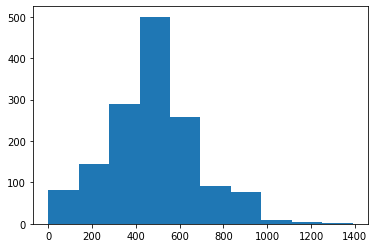

In [80]:
plot_hist("GarageArea")

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler=StandardScaler()
df_scaled= scaler.fit_transform(df)

In [83]:
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)

In [84]:
df_scaled

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.730311,0.073426,-0.045563,-0.221328,-0.203934,0.064282,0.749788,0.31239,-0.026198,0.604187,...,-0.359603,-0.11642,-0.270407,-0.063709,-0.087748,-1.601578,0.138375,0.312519,0.210071,0.346896
1,-1.727939,-0.871868,-0.045563,0.491760,-0.087252,0.064282,0.749788,0.31239,-0.026198,-0.629573,...,-0.359603,-0.11642,-0.270407,-0.063709,-0.087748,-0.490155,-0.614427,0.312519,0.210071,0.007136
2,-1.725566,0.073426,-0.045563,-0.078710,0.080162,0.064282,-1.379805,0.31239,-0.026198,0.604187,...,-0.359603,-0.11642,-0.270407,-0.063709,-0.087748,0.991743,0.138375,0.312519,0.210071,0.535652
3,-1.723193,0.309749,-0.045563,-0.459024,-0.092325,0.064282,-1.379805,0.31239,-0.026198,-1.863334,...,4.089589,-0.11642,-0.270407,-0.063709,-0.087748,-1.601578,-1.367230,0.312519,-3.425339,-0.515088
4,-1.720820,0.073426,-0.045563,0.681917,0.385566,0.064282,-1.379805,0.31239,-0.026198,-0.629573,...,-0.359603,-0.11642,-0.270407,-0.063709,-0.087748,2.103167,0.138375,0.312519,0.210071,0.869120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1.721999,0.073426,-0.045563,-0.363946,-0.258014,0.064282,0.749788,0.31239,-0.026198,0.604187,...,-0.359603,-0.11642,-0.270407,-0.063709,-0.087748,0.621269,-0.614427,0.312519,0.210071,-0.074658
1454,1.724371,-0.871868,-0.045563,0.729456,0.275478,0.064282,0.749788,0.31239,-0.026198,0.604187,...,-0.359603,-0.11642,-0.270407,-0.063709,-0.087748,-1.601578,1.643980,0.312519,0.210071,0.365772
1455,1.726744,0.309749,-0.045563,-0.173789,-0.143868,0.064282,0.749788,0.31239,-0.026198,0.604187,...,-0.359603,-0.11642,-0.270407,-0.063709,4.949624,-0.490155,1.643980,0.312519,0.210071,1.076752
1456,1.729117,-0.871868,-0.045563,-0.078710,-0.075381,0.064282,0.749788,0.31239,-0.026198,0.604187,...,1.472417,-0.11642,-0.270407,-0.063709,-0.087748,-0.860629,1.643980,0.312519,0.210071,-0.488348


In [85]:
df_scaled.shape

(1458, 76)

In [86]:
def scatter(x):
    plt.figure(figsize=(10,10))
    plt.scatter(df_scaled["SalePrice"],df_scaled[x])
    plt.xlabel("SalePrice")
    plt.ylabel(x)
    
    plt.show()

In [87]:
z=stats.zscore(df_scaled)
print(np.where(z>3))

(array([   1,    3,    5,    5,    7,    8,    9,    9,   17,   18,   24,
         25,   26,   28,   29,   33,   37,   37,   39,   41,   46,   48,
         48,   50,   51,   52,   52,   52,   53,   53,   53,   53,   53,
         54,   55,   58,   58,   60,   63,   64,   69,   70,   70,   72,
         74,   78,   80,   88,   93,   93,   93,   93,  102,  104,  105,
        106,  108,  113,  114,  115,  116,  116,  118,  120,  120,  120,
        125,  125,  129,  129,  137,  137,  144,  144,  144,  153,  154,
        155,  159,  159,  161,  165,  165,  166,  166,  166,  169,  169,
        169,  170,  171,  176,  176,  178,  178,  178,  178,  182,  184,
        185,  185,  185,  185,  185,  185,  185,  185,  187,  188,  188,
        188,  189,  190,  191,  196,  197,  197,  197,  197,  197,  197,
        198,  201,  205,  206,  208,  213,  215,  218,  218,  222,  224,
        224,  224,  224,  231,  233,  237,  237,  241,  245,  246,  246,
        246,  249,  249,  249,  251,  251,  253,  

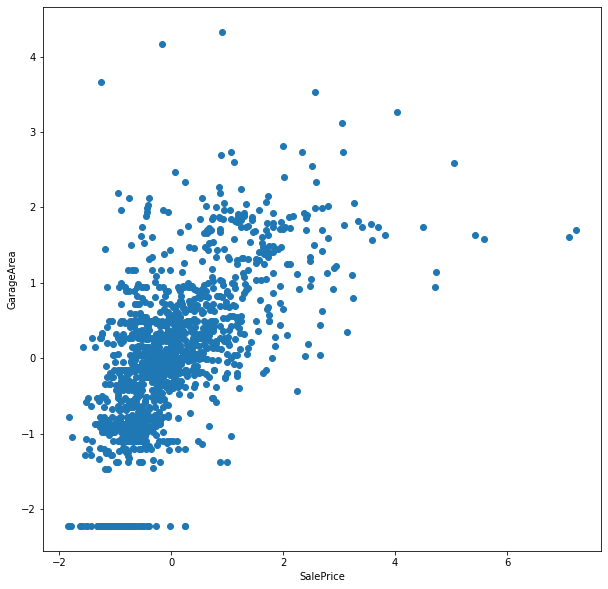

In [88]:
scatter("GarageArea")

In [89]:
df_scaled[(df_scaled["GarageArea"]>3.6)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
580,-0.351760,-0.871868,-0.045563,1.347466,0.227689,0.064282,0.749788,0.312390,-0.026198,0.604187,...,-0.359603,-0.11642,-0.270407,-0.063709,-0.087748,0.621269,0.891178,-0.976457,1.118923,0.910559
1060,0.787146,-0.635544,-4.790647,2.393329,0.765037,-15.556349,0.749788,-1.115398,-0.026198,0.604187,...,-0.359603,-0.11642,-0.270407,-0.063709,1.040623,0.621269,0.138375,-2.909921,0.210071,-1.257527
1189,1.093227,3.145628,-0.045563,-0.031171,2.232495,0.064282,0.749788,-1.115398,-0.026198,0.604187,...,-0.359603,-0.11642,-0.270407,-0.063709,-0.087748,-1.231104,-0.614427,0.312519,0.210071,-0.162744


In [90]:
df_scaled.drop([580,1060,1189],axis=0,inplace=True)

In [91]:
df_scaled.drop("Id",axis=1,inplace=True)

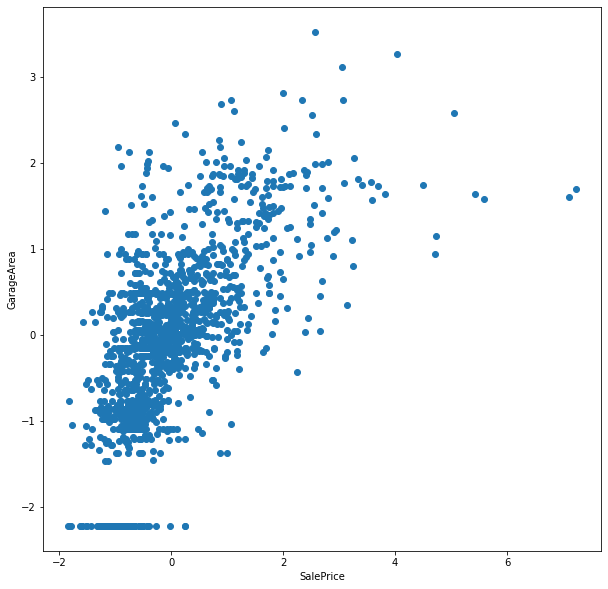

In [92]:
scatter("GarageArea")

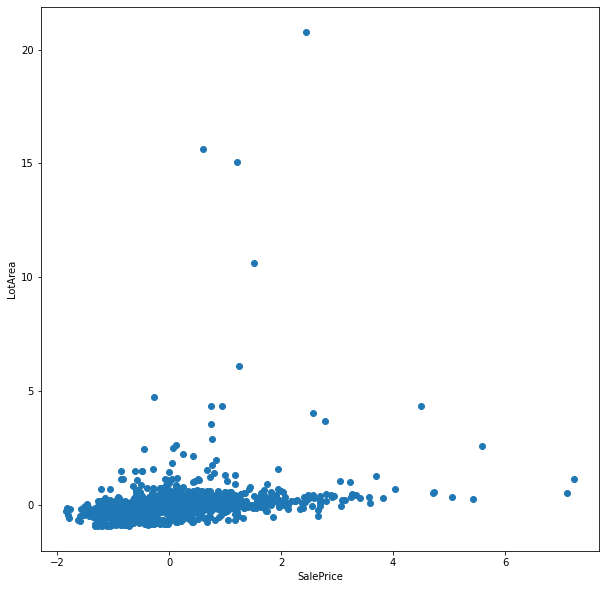

In [93]:
scatter("LotArea")

In [94]:
df_scaled[df_scaled["LotArea"]>12]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,-0.162898,-0.045563,-0.031171,15.071310,0.064282,-0.669941,-1.115398,-0.026198,-1.246454,7.012171,...,-0.359603,-0.11642,-0.270407,-0.063709,0.919726,-0.119680,-0.614427,0.312519,0.210071,1.208881
313,-0.871868,-0.045563,3.819506,20.778092,0.064282,0.039924,-1.115398,-0.026198,0.604187,7.012171,...,-0.359603,-0.11642,-0.270407,-0.063709,-0.087748,-0.119680,0.891178,0.312519,0.210071,2.442085
335,3.145628,-0.045563,-0.031171,15.645590,-15.556349,-1.379805,-2.543185,-0.026198,-1.863334,7.012171,...,-0.359603,-0.11642,-0.270407,-0.063709,1.322716,0.621269,0.138375,0.312519,0.210071,0.604233


In [95]:
df_scaled.drop([249,313,335],axis=0,inplace=True)

In [96]:
df_scaled.shape

(1452, 75)

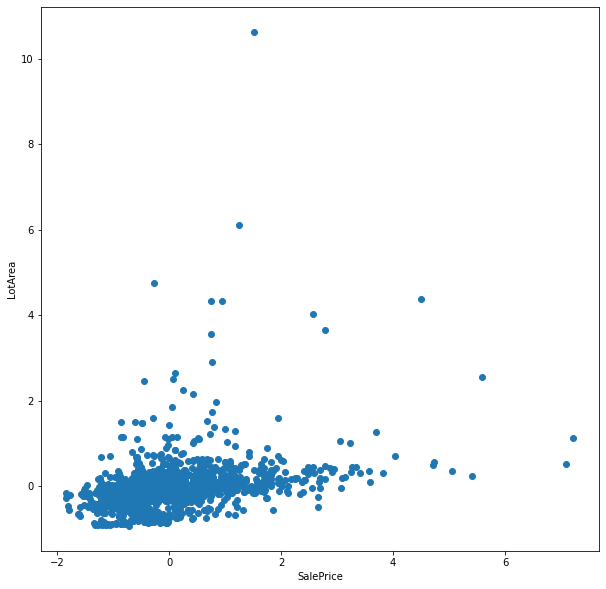

In [97]:
scatter("LotArea")

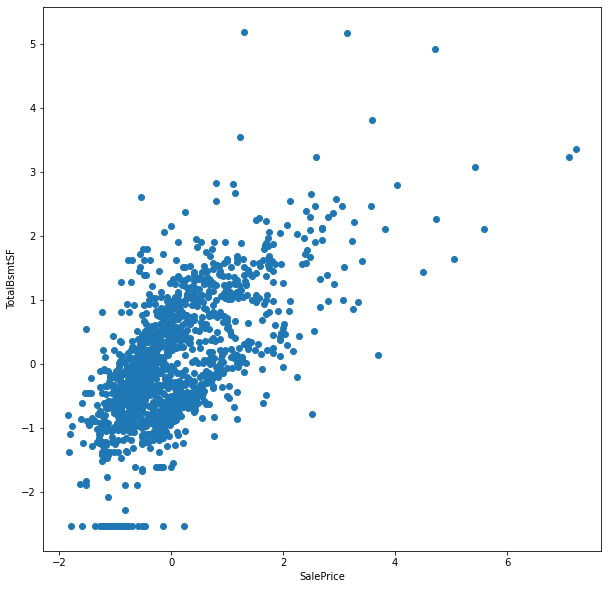

In [98]:
scatter("TotalBsmtSF")

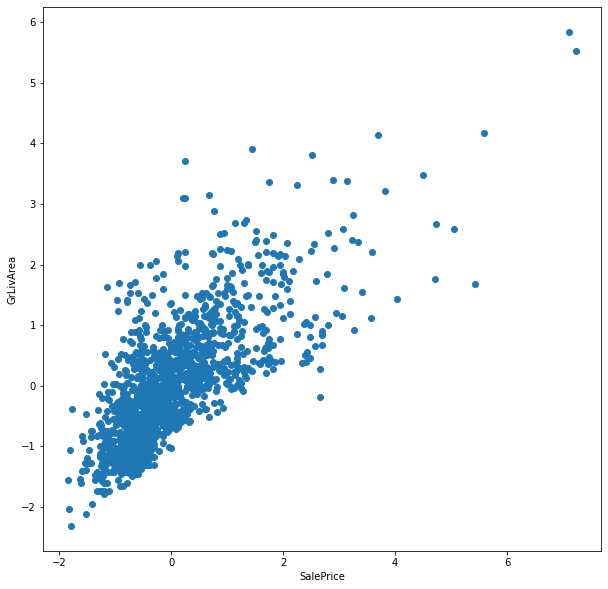

In [99]:
scatter("GrLivArea")

In [100]:
df_scaled[df_scaled["GrLivArea"]>5]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
690,0.073426,-0.045563,1.632702,1.123708,0.064282,-1.379805,0.31239,-0.026198,-1.863334,-0.225879,...,-0.359603,-0.11642,-0.270407,-0.063709,-0.087748,-1.972053,-0.614427,0.312519,0.210071,7.223896
1181,0.073426,-0.045563,4.294898,0.523859,0.064282,-1.379805,0.31239,-0.026198,-1.863334,-0.225879,...,-0.359603,-0.11642,-0.270407,14.466289,-0.087748,0.250794,-0.614427,0.312519,-3.425339,7.098059


In [101]:
df_scaled.drop([690,1181],axis=0,inplace=True)

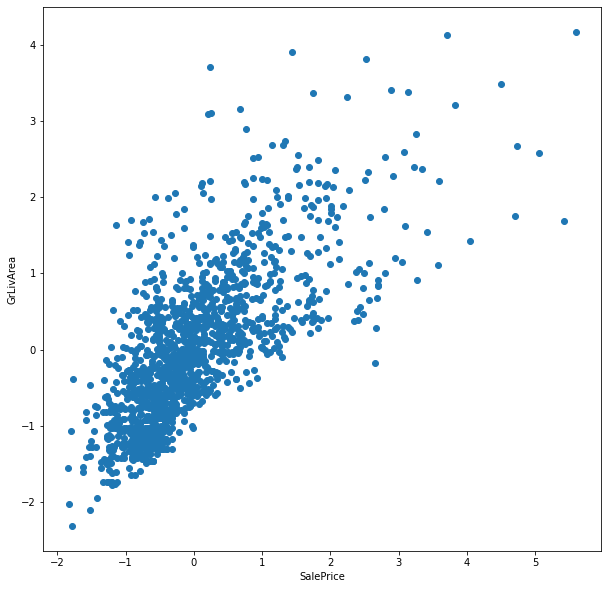

In [102]:
scatter("GrLivArea")

In [103]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1457
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1450 non-null   float64
 1   MSZoning       1450 non-null   float64
 2   LotFrontage    1450 non-null   float64
 3   LotArea        1450 non-null   float64
 4   Street         1450 non-null   float64
 5   LotShape       1450 non-null   float64
 6   LandContour    1450 non-null   float64
 7   Utilities      1450 non-null   float64
 8   LotConfig      1450 non-null   float64
 9   LandSlope      1450 non-null   float64
 10  Neighborhood   1450 non-null   float64
 11  Condition1     1450 non-null   float64
 12  Condition2     1450 non-null   float64
 13  BldgType       1450 non-null   float64
 14  HouseStyle     1450 non-null   float64
 15  OverallQual    1450 non-null   float64
 16  OverallCond    1450 non-null   float64
 17  YearBuilt      1450 non-null   float64
 18  YearRemo

In [104]:
df_scaled.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.073426,-0.045563,-0.221328,-0.203934,0.064282,0.749788,0.31239,-0.026198,0.604187,-0.225879,...,-0.359603,-0.116420,-0.270407,-0.063709,-0.087748,-1.601578,0.138375,0.312519,0.210071,0.346896
1,-0.871868,-0.045563,0.491760,-0.087252,0.064282,0.749788,0.31239,-0.026198,-0.629573,-0.225879,...,-0.359603,-0.116420,-0.270407,-0.063709,-0.087748,-0.490155,-0.614427,0.312519,0.210071,0.007136
2,0.073426,-0.045563,-0.078710,0.080162,0.064282,-1.379805,0.31239,-0.026198,0.604187,-0.225879,...,-0.359603,-0.116420,-0.270407,-0.063709,-0.087748,0.991743,0.138375,0.312519,0.210071,0.535652
3,0.309749,-0.045563,-0.459024,-0.092325,0.064282,-1.379805,0.31239,-0.026198,-1.863334,-0.225879,...,4.089589,-0.116420,-0.270407,-0.063709,-0.087748,-1.601578,-1.367230,0.312519,-3.425339,-0.515088
4,0.073426,-0.045563,0.681917,0.385566,0.064282,-1.379805,0.31239,-0.026198,-0.629573,-0.225879,...,-0.359603,-0.116420,-0.270407,-0.063709,-0.087748,2.103167,0.138375,0.312519,0.210071,0.869120
5,-0.162898,-0.045563,0.729456,0.370853,0.064282,-1.379805,0.31239,-0.026198,0.604187,-0.225879,...,-0.359603,10.794986,-0.270407,-0.063709,1.322716,1.362218,0.891178,0.312519,0.210071,-0.477337
6,-0.871868,-0.045563,0.254064,-0.038144,0.064282,0.749788,0.31239,-0.026198,0.604187,-0.225879,...,-0.359603,-0.116420,-0.270407,-0.063709,-0.087748,0.621269,-0.614427,0.312519,0.210071,1.586392
7,0.073426,-0.045563,-0.031171,-0.007908,0.064282,-1.379805,0.31239,-0.026198,-1.863334,-0.225879,...,3.369867,-0.116420,-0.270407,-0.063709,0.617484,1.732692,0.891178,0.312519,0.210071,0.239935
8,-0.162898,1.536132,-0.886877,-0.440343,0.064282,0.749788,0.31239,-0.026198,0.604187,-0.225879,...,2.993649,-0.116420,-0.270407,-0.063709,-0.087748,-0.860629,0.138375,0.312519,-3.425339,-0.642184
9,3.145628,-0.045563,-0.934416,-0.308441,0.064282,0.749788,0.31239,-0.026198,-1.863334,-0.225879,...,-0.359603,-0.116420,-0.270407,-0.063709,-0.087748,-1.972053,0.138375,0.312519,0.210071,-0.791930


In [105]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [106]:
X=df_scaled.drop("SalePrice",axis=1)
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.073426,-0.045563,-0.221328,-0.203934,0.064282,0.749788,0.31239,-0.026198,0.604187,-0.225879,...,0.225982,-0.359603,-0.11642,-0.270407,-0.063709,-0.087748,-1.601578,0.138375,0.312519,0.210071
1,-0.871868,-0.045563,0.491760,-0.087252,0.064282,0.749788,0.31239,-0.026198,-0.629573,-0.225879,...,-0.708304,-0.359603,-0.11642,-0.270407,-0.063709,-0.087748,-0.490155,-0.614427,0.312519,0.210071
2,0.073426,-0.045563,-0.078710,0.080162,0.064282,-1.379805,0.31239,-0.026198,0.604187,-0.225879,...,-0.065025,-0.359603,-0.11642,-0.270407,-0.063709,-0.087748,0.991743,0.138375,0.312519,0.210071
3,0.309749,-0.045563,-0.459024,-0.092325,0.064282,-1.379805,0.31239,-0.026198,-1.863334,-0.225879,...,-0.172238,4.089589,-0.11642,-0.270407,-0.063709,-0.087748,-1.601578,-1.367230,0.312519,-3.425339
4,0.073426,-0.045563,0.681917,0.385566,0.064282,-1.379805,0.31239,-0.026198,-0.629573,-0.225879,...,0.578253,-0.359603,-0.11642,-0.270407,-0.063709,-0.087748,2.103167,0.138375,0.312519,0.210071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,0.073426,-0.045563,-0.363946,-0.258014,0.064282,0.749788,0.31239,-0.026198,0.604187,-0.225879,...,-0.095658,-0.359603,-0.11642,-0.270407,-0.063709,-0.087748,0.621269,-0.614427,0.312519,0.210071
1454,-0.871868,-0.045563,0.729456,0.275478,0.064282,0.749788,0.31239,-0.026198,0.604187,-0.225879,...,-0.708304,-0.359603,-0.11642,-0.270407,-0.063709,-0.087748,-1.601578,1.643980,0.312519,0.210071
1455,0.309749,-0.045563,-0.173789,-0.143868,0.064282,0.749788,0.31239,-0.026198,0.604187,-0.225879,...,0.210665,-0.359603,-0.11642,-0.270407,-0.063709,4.949624,-0.490155,1.643980,0.312519,0.210071
1456,-0.871868,-0.045563,-0.078710,-0.075381,0.064282,0.749788,0.31239,-0.026198,0.604187,-0.225879,...,-0.708304,1.472417,-0.11642,-0.270407,-0.063709,-0.087748,-0.860629,1.643980,0.312519,0.210071


In [107]:
y=df_scaled["SalePrice"]
y

0       0.346896
1       0.007136
2       0.535652
3      -0.515088
4       0.869120
          ...   
1453   -0.074658
1454    0.365772
1455    1.076752
1456   -0.488348
1457   -0.420710
Name: SalePrice, Length: 1450, dtype: float64

In [108]:
rs_svm=RandomizedSearchCV(SVR(gamma="auto"),{
    "C":[10,20,40],
    "kernel":["rbf","linear","poly"]},cv=5,n_iter=3)
rs_svm.fit(X,y)
pd.DataFrame(rs_svm.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.157741,0.031681,0.022844,0.007275,poly,40,"{'kernel': 'poly', 'C': 40}",0.875049,0.891900,0.814433,0.865325,0.854581,0.860257,0.025992,2
1,0.190286,0.022786,0.064777,0.004470,rbf,20,"{'kernel': 'rbf', 'C': 20}",0.831971,0.873205,0.845245,0.885455,0.823570,0.851889,0.023765,3
2,45.953180,7.623525,0.012582,0.003219,linear,20,"{'kernel': 'linear', 'C': 20}",0.885716,0.908374,0.871875,0.878773,0.883428,0.885633,0.012316,1


In [109]:
rs_rf=RandomizedSearchCV(RandomForestRegressor(),{
    "n_estimators":[100,150,200],
    "max_depth":[5,7,10]},cv=5,n_iter=3)
rs_rf.fit(X,y)
pd.DataFrame(rs_rf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.743191,0.040459,0.011642,0.002387,100,5,"{'n_estimators': 100, 'max_depth': 5}",0.839398,0.904643,0.842771,0.847065,0.830419,0.852859,0.026464,3
1,1.070122,0.019692,0.016255,0.005175,150,5,"{'n_estimators': 150, 'max_depth': 5}",0.847242,0.905488,0.842021,0.847066,0.831419,0.854647,0.026062,2
2,2.575206,0.060368,0.027228,0.004660,200,10,"{'n_estimators': 200, 'max_depth': 10}",0.876847,0.927611,0.870007,0.881039,0.856805,0.882462,0.024022,1


In [110]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3)

In [111]:
clf=LinearRegression()
clf.fit(X_train,y_train)

LinearRegression()

In [112]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [113]:
y_pred=clf.predict(X_test)

In [114]:
mean_squared_error(y_pred,y_test)


0.09491624496366297

In [115]:
r2_score(y_pred,y_test)

0.8849230157872118

C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

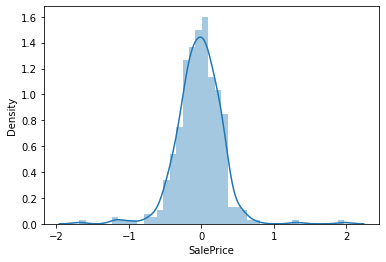

In [116]:
sns.distplot(y_test-y_pred)

In [117]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [118]:
ridge=Ridge()


In [119]:
parameters={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,3,5,10,20,30,40,55,100]}
ridge_regressor=RandomizedSearchCV(ridge,parameters,cv=5)
ridge_regressor.fit(X,y)

RandomizedSearchCV(cv=5, estimator=Ridge(),
                   param_distributions={'alpha': [1e-15, 1e-10, 1e-08, 0.001,
                                                  0.01, 1, 3, 5, 10, 20, 30, 40,
                                                  55, 100]})

In [120]:
print(ridge_regressor.best_score_)
print(ridge_regressor.best_params_)

0.8870705295999697
{'alpha': 100}


In [121]:
lasso=Lasso()

In [122]:
lasso_regressor=RandomizedSearchCV(lasso,parameters,cv=5)
lasso_regressor.fit(X,y)

RandomizedSearchCV(cv=5, estimator=Lasso(),
                   param_distributions={'alpha': [1e-15, 1e-10, 1e-08, 0.001,
                                                  0.01, 1, 3, 5, 10, 20, 30, 40,
                                                  55, 100]})

In [123]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.001}
0.8865818313173339


In [124]:
ridge_pred=ridge_regressor.predict(X_test)

In [125]:
lasso_pred=lasso_regressor.predict(X_test)

In [126]:
mean_squared_error(ridge_pred,y_test)

0.06785713919003958

In [127]:
mean_squared_error(lasso_pred,y_test)

0.06780777376765658

In [128]:
r2_score(ridge_pred,y_test)

0.9092348253514426

In [129]:
r2_score(lasso_pred,y_test)

0.9115055953994158

C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

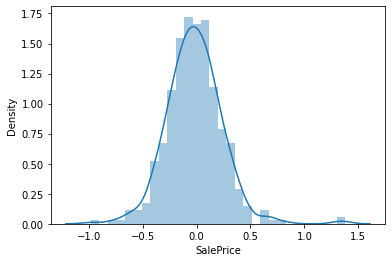

In [130]:
sns.distplot(y_test-ridge_pred)

C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

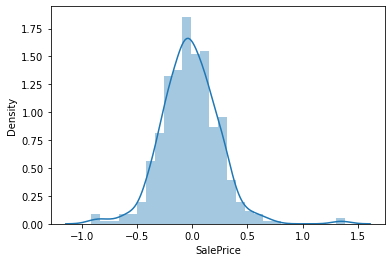

In [131]:
sns.distplot(y_test-lasso_pred)

In [132]:
dft=df_test.copy()

In [133]:
df_test.shape

(1459, 80)

In [134]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [135]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [136]:
Id=df_test["Id"]

In [137]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

<AxesSubplot:>

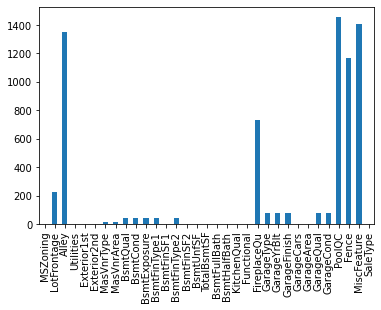

In [138]:
missing_test_vals=df_test.isnull().sum()
missing_test_vals=missing_test_vals[missing_test_vals>0]
missing_test_vals.plot.bar()

In [139]:
df_test.drop(["Fence","Alley","MiscFeature","PoolQC","FireplaceQu"],axis=1,inplace=True)

In [140]:
df_test.shape

(1459, 75)

In [141]:
df_test.select_dtypes(include="object").columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [142]:
test_cat_features=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']

In [143]:
def show_test(x):
    print("null values in",x,":",df_test[x].isnull().sum())
    if df_test[x].dtypes=="object":
        
        print("mode of",x,":",df_test[x].mode())
        
    else:
        print("mean of",x,":",df_test[x].mean())
        print("median of",x,":",df_test[x].median())
        print("mode of",x,":",df_test[x].mode())
    
        sns.distplot(df_test[x])
    
        plt.show()
    
        sns.boxplot(df_test[x])
        plt.show()

In [144]:
show_test("MSZoning")

null values in MSZoning : 4
mode of MSZoning : 0    RL
dtype: object


In [145]:
df_test.MSZoning.fillna(df_test.MSZoning.mode()[0], inplace=True)
df_test.MSZoning.isnull().sum()

0

In [146]:
def fill_object(x):
    if df_test[x].dtypes=="object":
        df_test[x].fillna(df_test[x].mode()[0],inplace=True)
        
    

null values in LotFrontage : 227
mean of LotFrontage : 68.58035714285714
median of LotFrontage : 67.0
mode of LotFrontage : 0    60.0
dtype: float64


C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


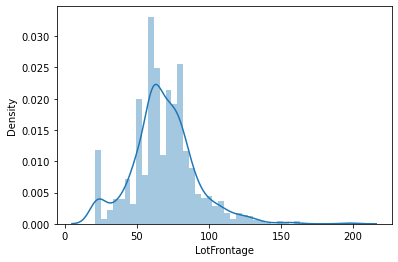

C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


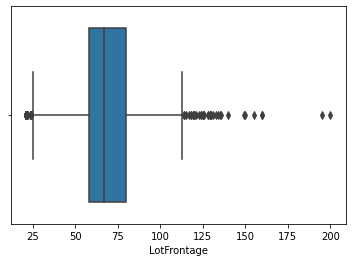

In [147]:
show_test("LotFrontage")

In [148]:
df_test.LotFrontage.fillna(df_test.LotFrontage.median(),inplace=True)
df_test.LotFrontage.isnull().sum()

0

In [149]:
missing_test_vals

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [150]:
show_test("Utilities")

null values in Utilities : 2
mode of Utilities : 0    AllPub
dtype: object


In [151]:
fill_object("Utilities")

In [152]:
df_test.Utilities.isnull().sum()

0

In [153]:
show_test("Exterior1st")

null values in Exterior1st : 1
mode of Exterior1st : 0    VinylSd
dtype: object


In [154]:
fill_object("Exterior1st")
df_test.Exterior1st.isnull().sum()

0

In [155]:
fill_object("Exterior2nd")
df_test.Exterior2nd.isnull().sum()

0

In [156]:
show_test("MasVnrType")

null values in MasVnrType : 16
mode of MasVnrType : 0    None
dtype: object


In [157]:
fill_object("MasVnrType")
df_test.MasVnrType.isnull().sum()

0

In [158]:
def fill(x):
    if df_test[x].dtypes=="float64":
        df_test[x].fillna(df_test[x].median(),inplace=True)
        
        
    elif df_test[x].dtypes=="int64":
        df_test[x].fillna(df_test[x].median(),inplace=True)

null values in MasVnrArea : 15
mean of MasVnrArea : 100.70914127423822
median of MasVnrArea : 0.0
mode of MasVnrArea : 0    0.0
dtype: float64


C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


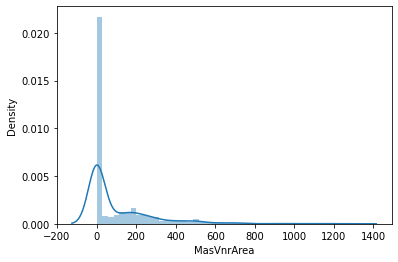

C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


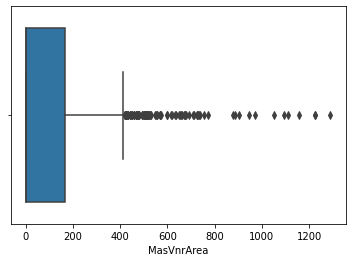

In [159]:
show_test("MasVnrArea")

In [160]:
fill("MasVnrArea")
df_test.MasVnrArea.isnull().sum()

0

In [161]:
show_test("BsmtQual")

null values in BsmtQual : 44
mode of BsmtQual : 0    TA
dtype: object


In [162]:
fill_object("BsmtQual")
df_test.BsmtQual.isnull().sum()

0

In [163]:
show_test("BsmtCond")

null values in BsmtCond : 45
mode of BsmtCond : 0    TA
dtype: object


In [164]:
def null(x):
    print(df_test[x].isnull().sum())

In [165]:
fill_object("BsmtCond")
null("BsmtCond")

0


In [166]:
show_test("BsmtExposure")

null values in BsmtExposure : 44
mode of BsmtExposure : 0    No
dtype: object


In [167]:
fill_object("BsmtExposure")
null("BsmtExposure")

0


In [168]:
show_test("BsmtFinType1")

null values in BsmtFinType1 : 42
mode of BsmtFinType1 : 0    GLQ
dtype: object


In [169]:
fill_object("BsmtFinType1")
null("BsmtFinType1")

0


null values in BsmtFinSF1 : 1
mean of BsmtFinSF1 : 439.2037037037037
median of BsmtFinSF1 : 350.5
mode of BsmtFinSF1 : 0    0.0
dtype: float64


C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


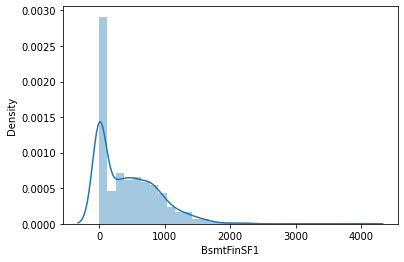

C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


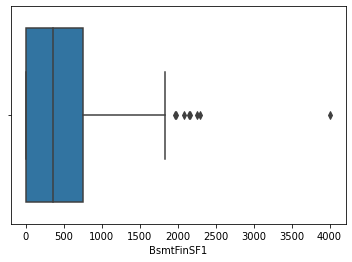

In [170]:
show_test("BsmtFinSF1")

In [171]:
fill("BsmtFinSF1")
null("BsmtFinSF1")

0


In [172]:
show_test("BsmtFinType2")

null values in BsmtFinType2 : 42
mode of BsmtFinType2 : 0    Unf
dtype: object


In [173]:
fill_object("BsmtFinType2")
null("BsmtFinType2")

0


null values in BsmtFinSF2 : 1
mean of BsmtFinSF2 : 52.61934156378601
median of BsmtFinSF2 : 0.0
mode of BsmtFinSF2 : 0    0.0
dtype: float64


C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


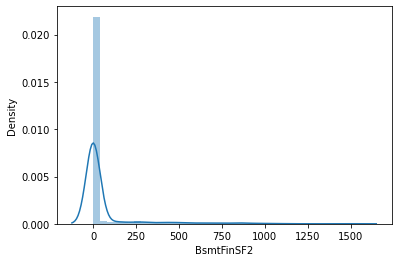

C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


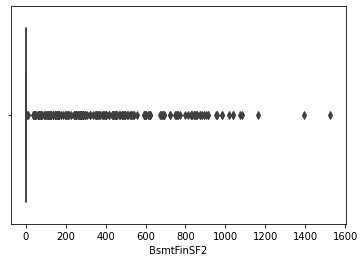

In [174]:
show_test("BsmtFinSF2")

In [175]:
fill("BsmtFinSF2")
null("BsmtFinSF2")

0


C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


null values in BsmtUnfSF : 1
mean of BsmtUnfSF : 554.2949245541838
median of BsmtUnfSF : 460.0
mode of BsmtUnfSF : 0    0.0
dtype: float64


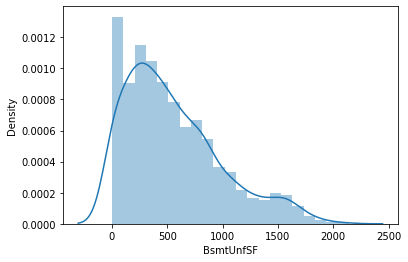

C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


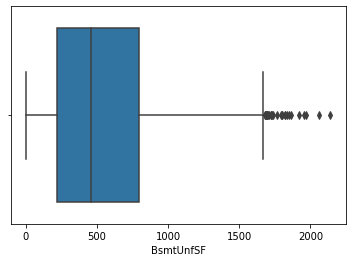

In [176]:
show_test("BsmtUnfSF")

In [177]:
fill("BsmtUnfSF")
null("BsmtUnfSF")

0


C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


null values in TotalBsmtSF : 1
mean of TotalBsmtSF : 1046.1179698216736
median of TotalBsmtSF : 988.0
mode of TotalBsmtSF : 0    0.0
dtype: float64


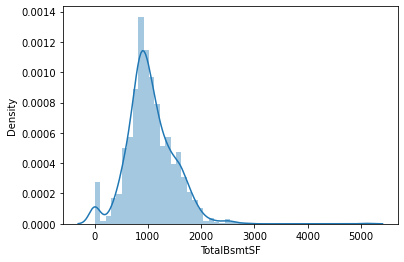

C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


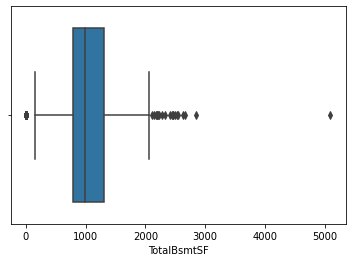

In [178]:
show_test("TotalBsmtSF")

In [179]:
fill("TotalBsmtSF")
null("TotalBsmtSF")

0


C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


null values in BsmtFullBath : 2
mean of BsmtFullBath : 0.4344543582704187
median of BsmtFullBath : 0.0
mode of BsmtFullBath : 0    0.0
dtype: float64


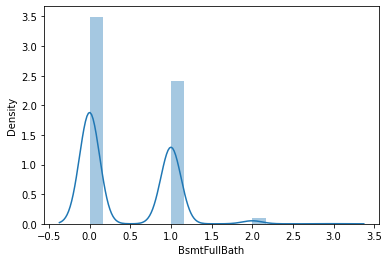

C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


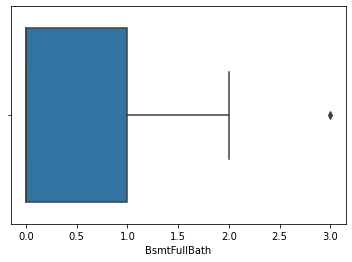

In [180]:
show_test("BsmtFullBath")

In [181]:
fill("BsmtFullBath")
null("BsmtFullBath")

0


C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


null values in BsmtHalfBath : 2
mean of BsmtHalfBath : 0.06520247083047358
median of BsmtHalfBath : 0.0
mode of BsmtHalfBath : 0    0.0
dtype: float64


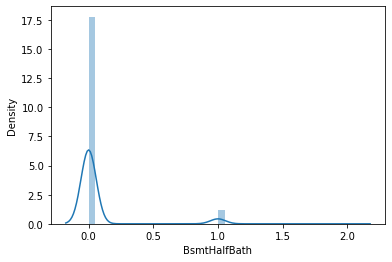

C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


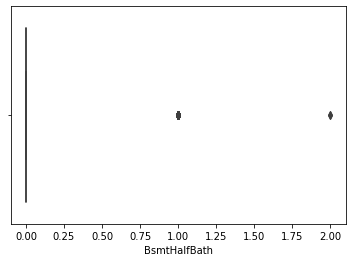

In [182]:
show_test("BsmtHalfBath")

In [183]:
fill("BsmtHalfBath")
null("BsmtHalfBath")

0


In [184]:
show_test("KitchenQual")

null values in KitchenQual : 1
mode of KitchenQual : 0    TA
dtype: object


In [185]:
fill_object("KitchenQual")
null("KitchenQual")

0


In [186]:
show_test("Functional")

null values in Functional : 2
mode of Functional : 0    Typ
dtype: object


In [187]:
fill_object("Functional")
null("Functional")

0


In [188]:
show_test("GarageType")

null values in GarageType : 76
mode of GarageType : 0    Attchd
dtype: object


In [189]:
fill_object("GarageType")
null("GarageType")

0


null values in GarageYrBlt : 78
mean of GarageYrBlt : 1977.7212165097756
median of GarageYrBlt : 1979.0
mode of GarageYrBlt : 0    2005.0
dtype: float64


C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


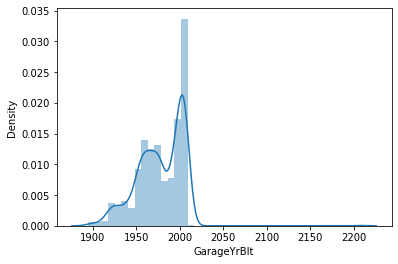

C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


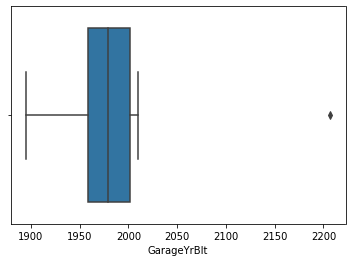

In [190]:
show_test("GarageYrBlt")

In [191]:
df_test.GarageYrBlt.fillna(df_test.GarageYrBlt.mode()[0],inplace=True)

In [192]:
df_test.GarageYrBlt.isnull().sum()

0

In [193]:
show_test("GarageFinish")

null values in GarageFinish : 78
mode of GarageFinish : 0    Unf
dtype: object


In [194]:
fill_object("GarageFinish")
null("GarageFinish")

0


null values in GarageCars : 1
mean of GarageCars : 1.7661179698216736
median of GarageCars : 2.0
mode of GarageCars : 0    2.0
dtype: float64


C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


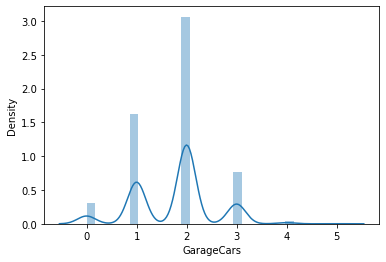

C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


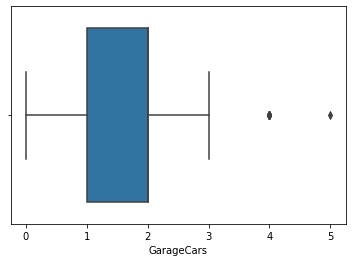

In [195]:
show_test("GarageCars")

In [196]:
fill("GarageCars")
null("GarageCars")

0


C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


null values in GarageArea : 1
mean of GarageArea : 472.76886145404666
median of GarageArea : 480.0
mode of GarageArea : 0    0.0
dtype: float64


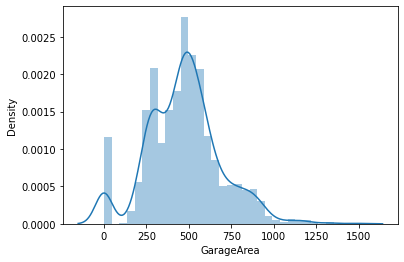

C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


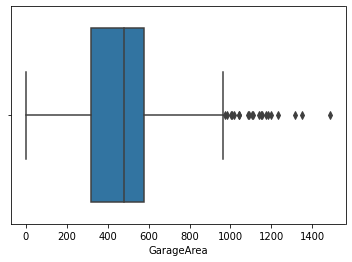

In [197]:
show_test("GarageArea")

In [198]:
fill("GarageArea")
null("GarageArea")

0


In [199]:
show_test("GarageQual")

null values in GarageQual : 78
mode of GarageQual : 0    TA
dtype: object


In [200]:
fill_object("GarageQual")
null("GarageQual")

0


In [201]:
show_test("GarageCond")

null values in GarageCond : 78
mode of GarageCond : 0    TA
dtype: object


In [202]:
fill_object("GarageCond")
null("GarageCond")

0


In [203]:
show_test("SaleType")

null values in SaleType : 1
mode of SaleType : 0    WD
dtype: object


In [204]:
fill_object("SaleType")
null("SaleType")

0


In [205]:
test_cat_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [206]:
for i in test_cat_features:
    encoder=LabelEncoder()
    encoder.fit(list(df_test[i].values))
    df_test[i]=encoder.transform(list(df_test[i].values))

In [207]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int32  
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int32  
 6   LotShape       1459 non-null   int32  
 7   LandContour    1459 non-null   int32  
 8   Utilities      1459 non-null   int32  
 9   LotConfig      1459 non-null   int32  
 10  LandSlope      1459 non-null   int32  
 11  Neighborhood   1459 non-null   int32  
 12  Condition1     1459 non-null   int32  
 13  Condition2     1459 non-null   int32  
 14  BldgType       1459 non-null   int32  
 15  HouseStyle     1459 non-null   int32  
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [208]:
df_test_scaled=scaler.fit_transform(df_test)

In [209]:
df_test_scaled=pd.DataFrame(df_test_scaled,columns=df_test.columns)

In [210]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,3,3,0,4,...,0,0,0,120,0,0,6,2010,8,4
1,1462,20,3,81.0,14267,1,0,3,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,1463,60,3,74.0,13830,1,0,3,0,4,...,34,0,0,0,0,0,3,2010,8,4
3,1464,60,3,78.0,9978,1,0,3,0,4,...,36,0,0,0,0,0,6,2010,8,4
4,1465,120,3,43.0,5005,1,0,1,0,4,...,82,0,0,144,0,0,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,4,21.0,1936,1,3,3,0,4,...,0,0,0,0,0,0,6,2006,8,4
1455,2916,160,4,21.0,1894,1,3,3,0,4,...,24,0,0,0,0,0,4,2006,8,0
1456,2917,20,3,160.0,20000,1,3,3,0,4,...,0,0,0,0,0,0,9,2006,8,0
1457,2918,85,3,62.0,10441,1,3,3,0,4,...,32,0,0,0,0,700,7,2006,8,4


In [211]:
df_test_scaled

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-1.730864,-0.874711,-1.501777,0.567330,0.363929,0.06426,0.742620,0.31870,0.0,0.572445,...,-0.701628,-0.360738,-0.088827,1.818960,-0.057227,-0.092244,-0.038281,1.713905,0.32475,0.201383
1,-1.728490,-0.874711,-0.039098,0.615963,0.897861,0.06426,-1.384637,0.31870,0.0,-1.950811,...,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,19.730438,-0.038281,1.713905,0.32475,0.201383
2,-1.726115,0.061351,-0.039098,0.275532,0.809646,0.06426,-1.384637,0.31870,0.0,0.572445,...,-0.207871,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-1.140614,1.713905,0.32475,0.201383
3,-1.723741,0.061351,-0.039098,0.470064,0.032064,0.06426,-1.384637,0.31870,0.0,0.572445,...,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.038281,1.713905,0.32475,0.201383
4,-1.721367,1.465443,-0.039098,-1.232092,-0.971808,0.06426,-1.384637,-2.53396,0.0,0.572445,...,0.489198,-0.360738,-0.088827,2.243060,-0.057227,-0.092244,-1.875504,1.713905,0.32475,0.201383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.721367,2.401505,1.423581,-2.302019,-1.591330,0.06426,0.742620,0.31870,0.0,0.572445,...,-0.701628,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.038281,-1.359958,0.32475,0.201383
1455,1.723741,2.401505,1.423581,-2.302019,-1.599808,0.06426,0.742620,0.31870,0.0,0.572445,...,-0.353093,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.773170,-1.359958,0.32475,-3.589818
1456,1.726115,-0.874711,-0.039098,4.457971,2.055150,0.06426,0.742620,0.31870,0.0,0.572445,...,-0.701628,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,1.064053,-1.359958,0.32475,-3.589818
1457,1.728490,0.646389,-0.039098,-0.308065,0.125527,0.06426,0.742620,0.31870,0.0,0.572445,...,-0.236915,-0.360738,-0.088827,-0.301543,-0.057227,1.017827,0.329164,-1.359958,0.32475,0.201383


In [212]:
df_test_scaled.drop("Id",axis=1,inplace=True)

In [213]:
df_test_scaled

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-0.874711,-1.501777,0.567330,0.363929,0.06426,0.742620,0.31870,0.0,0.572445,-0.207992,...,-0.701628,-0.360738,-0.088827,1.818960,-0.057227,-0.092244,-0.038281,1.713905,0.32475,0.201383
1,-0.874711,-0.039098,0.615963,0.897861,0.06426,-1.384637,0.31870,0.0,-1.950811,-0.207992,...,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,19.730438,-0.038281,1.713905,0.32475,0.201383
2,0.061351,-0.039098,0.275532,0.809646,0.06426,-1.384637,0.31870,0.0,0.572445,-0.207992,...,-0.207871,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-1.140614,1.713905,0.32475,0.201383
3,0.061351,-0.039098,0.470064,0.032064,0.06426,-1.384637,0.31870,0.0,0.572445,-0.207992,...,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.038281,1.713905,0.32475,0.201383
4,1.465443,-0.039098,-1.232092,-0.971808,0.06426,-1.384637,-2.53396,0.0,0.572445,-0.207992,...,0.489198,-0.360738,-0.088827,2.243060,-0.057227,-0.092244,-1.875504,1.713905,0.32475,0.201383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.401505,1.423581,-2.302019,-1.591330,0.06426,0.742620,0.31870,0.0,0.572445,-0.207992,...,-0.701628,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.038281,-1.359958,0.32475,0.201383
1455,2.401505,1.423581,-2.302019,-1.599808,0.06426,0.742620,0.31870,0.0,0.572445,-0.207992,...,-0.353093,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.773170,-1.359958,0.32475,-3.589818
1456,-0.874711,-0.039098,4.457971,2.055150,0.06426,0.742620,0.31870,0.0,0.572445,-0.207992,...,-0.701628,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,1.064053,-1.359958,0.32475,-3.589818
1457,0.646389,-0.039098,-0.308065,0.125527,0.06426,0.742620,0.31870,0.0,0.572445,-0.207992,...,-0.236915,-0.360738,-0.088827,-0.301543,-0.057227,1.017827,0.329164,-1.359958,0.32475,0.201383


In [214]:
df_test_scaled.shape

(1459, 74)

In [215]:
Sales_Price_Prediction=ridge_regressor.predict(df_test_scaled)

In [216]:
Sales_Price_Prediction.shape

(1459,)

In [217]:
data={"Id":Id, "Predicted_Sale_Price":Sales_Price_Prediction}

In [218]:
new_df=pd.DataFrame(data)

In [219]:
new_df

,Id,Predicted_Sale_Price
0,1461,-0.700664
1,1462,-0.211405
2,1463,0.051157
3,1464,0.082168
4,1465,0.033769
...,...,...
1454,2915,-1.363305
1455,2916,-1.496133
1456,2917,0.006183
1457,2918,-0.692121
